## Homework

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')
df.shape

(45211, 17)


### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

In [3]:
df = df[['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']]
df.shape

(45211, 15)



### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.

In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64



### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- **`secondary`**
- `tertiary`

In [5]:
df.education.mode()

0    secondary
Name: education, dtype: object




### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- **`pdays` and `previous`**

In [6]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [9]:
categorical = ['job',
'marital',
'education',
'housing',
'contact',
'month',
'poutcome']

In [10]:
corr = df[numerical].corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


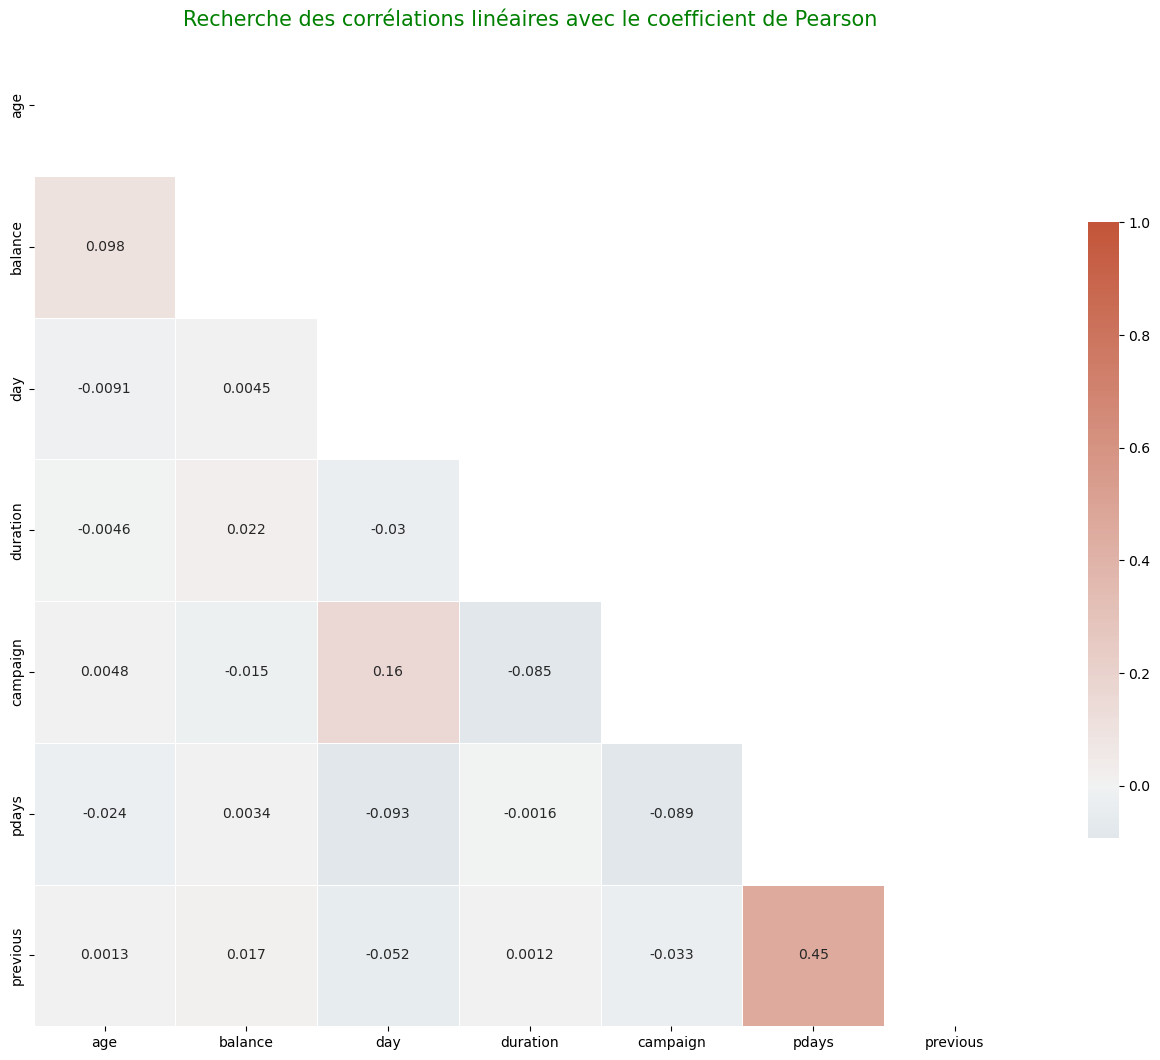

In [11]:
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (16, 16))

cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.grid(visible = False)
plt.title('Recherche des corrélations linéaires avec le coefficient de Pearson', color='green', fontsize=15)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot = True, linewidths=.5, cbar_kws={"shrink": .5});

The biggest correlation is between **pdays** and **previous**.




### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [12]:
df.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [13]:
df.y.nunique()

2

In [14]:
df.y = (df.y == 'yes').astype(int)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32



### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=42)

In [17]:
len(df_train), len(df_val), len(df_test)

(27125, 9043, 9043)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']


### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- **`poutcome`**


In [20]:
from sklearn.metrics import mutual_info_score

In [21]:
def mutual_info_y_score(series):
    return mutual_info_score(series, df_full_train.y)

In [22]:
mi = df_full_train[categorical].apply(mutual_info_y_score)
mi.sort_values(ascending=False)

poutcome     0.029257
month        0.024774
contact      0.014164
housing      0.009800
job          0.007765
education    0.002458
marital      0.002019
dtype: float64



### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- **0.9**


In [23]:
from sklearn.feature_extraction import DictVectorizer

In [24]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [27]:
y_pred = model.predict_proba(X_val)[:, 1]

In [28]:
y_decision = (y_pred >= 0.5)

In [29]:
original_accuracy = (y_val == y_decision).mean()
original_accuracy.round(2)

0.9



### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- **`age`**
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.



In [30]:
results = []  # List to store the results (column and accuracy difference)

for f in categorical + numerical:
    dv = DictVectorizer(sparse=False)
    
    # Prepare the training dictionaries by excluding the current column
    train_dict = df_train.drop(columns=f).to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    # Prepare the validation dictionaries by excluding the current column
    val_dict = df_val.drop(columns=f).to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    y_decision = (y_pred >= 0.5)
    
    # Calculate the accuracy
    accuracy = (y_val == y_decision).mean()
    diff_accuracy = accuracy - original_accuracy
    
    # Add the results to the list
    results.append((f, diff_accuracy))

# Sort the results based on the absolute value of the accuracy differences
results.sort(key=lambda x: abs(x[1]))

# Display the sorted results
for f, diff_accuracy in results:
    print(f"{f}: Accuracy difference = {diff_accuracy:.4f}")
    print('-' * 50)

job: Accuracy difference = 0.0001
--------------------------------------------------
housing: Accuracy difference = -0.0002
--------------------------------------------------
age: Accuracy difference = -0.0002
--------------------------------------------------
day: Accuracy difference = 0.0002
--------------------------------------------------
balance: Accuracy difference = -0.0004
--------------------------------------------------
pdays: Accuracy difference = -0.0004
--------------------------------------------------
campaign: Accuracy difference = -0.0006
--------------------------------------------------
previous: Accuracy difference = -0.0006
--------------------------------------------------
education: Accuracy difference = -0.0007
--------------------------------------------------
contact: Accuracy difference = -0.0007
--------------------------------------------------
marital: Accuracy difference = -0.0009
--------------------------------------------------
month: Accuracy differ

Among the 4 propositions, **age** gives the smallest difference between accuracies.


### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- **0.1**
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.


In [31]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [32]:
scores = {}
for C in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    y_decision = (y_pred >= 0.5)
    accuracy = (y_val == y_decision).mean()
    scores[C] = round(accuracy, 3)
    print(f"C = {C}:\t accuracy = {accuracy}")

C = 0.01:	 accuracy = 0.8980426849496849
C = 0.1:	 accuracy = 0.9011390025434037
C = 1:	 accuracy = 0.9011390025434037
C = 10:	 accuracy = 0.9006966714585868
C = 100:	 accuracy = 0.9011390025434037


In [33]:
scores

{0.01: 0.898, 0.1: 0.901, 1: 0.901, 10: 0.901, 100: 0.901}

In [34]:
print(f"The smallest best `C` is {max(scores, key = scores.get)}.")

The smallest best `C` is 0.1.



## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw03
* If your answer doesn't match options exactly, select the closest one